## Assumptions

1. Subject will reach points at event seconds
2. Speed is adjusted if points limit velocity and acceleration

A smoothing filter is applied to identify points where the route turn is beyond a threshold. This creates a constraint for where output points will be to create smooth animation.

## Algorithm

1. Given a list of locations on a route $polyline$
2. Create a $smoothRoute = smooth(polyline)$ where every location is changing route direction by $SmoothRouteThreshold$
3. Create a $speedGraph$ where locations and roads have a speed, roads have max and locations have a minimum
4. Interpolate each location to location with 1/s connection locations

### Constraints
- $SmoothRouteThreshold$ Maximum direction change between two points
- $SpeedGraph$ Every point and edge has a desired speed

### Equations

EDIT: these all changed after hacking

Calculate the accelaration

- Accelera iteration $a(t)=min(MAX_A, MAX_V-v(t-1))$
- Accelera iteration $a(t)=MAX_A$ if $d(t)*v(t) < D$
- Decelera iteration $a(t)=MIN_A$ if $d(t)*v(t) > D$
- Constant iteration $a(t)=0$ if $v(t) == MAX_V$

Update the subject

- Velocity iteration $v(t)=v(t-1)+a(t)$
- Position iteration $p(t)=p(t-1)+\frac{v(t) + v(t-1)}{2\Delta{t}}$
- Distance iteration $d(t)=D-p(t)$

In [6]:
def distanceToStop(velocity, acceleration):
    distanceToStop = velocity
    while (velocity > 0):
        velocityNext = velocity + acceleration
        distanceToStop += (velocity + velocityNext) / 2.0
        velocity = velocityNext
    return distanceToStop

stoppingDistance:26.0 remainingDistance:5000.32 slowDownFactor:0.0051996672212978375
stoppingDistance:31.0 remainingDistance:4989.82 slowDownFactor:0.006212648953268856
stoppingDistance:40.5 remainingDistance:4977.82 slowDownFactor:0.008136091702793592
stoppingDistance:58.0 remainingDistance:4963.32 slowDownFactor:0.011685726489527173
stoppingDistance:86.5 remainingDistance:4945.32 slowDownFactor:0.017491284689362875
stoppingDistance:120.0 remainingDistance:4923.32 slowDownFactor:0.02437379654379565
stoppingDistance:158.0 remainingDistance:4897.32 slowDownFactor:0.032262543595272516
stoppingDistance:148.5 remainingDistance:4869.82 slowDownFactor:0.030493940227770227
stoppingDistance:148.5 remainingDistance:4842.82 slowDownFactor:0.030663951994912057
stoppingDistance:148.5 remainingDistance:4815.82 slowDownFactor:0.030835870111424434
stoppingDistance:148.5 remainingDistance:4788.82 slowDownFactor:0.031009726822056376
stoppingDistance:148.5 remainingDistance:4761.82 slowDownFactor:0.0311

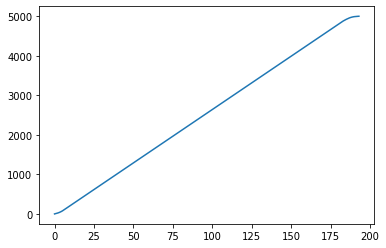

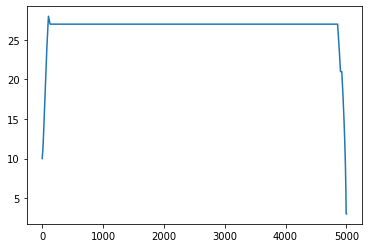

t:0	a:0	v:10	p:0
t:1	a:1	v:11	p:10.5
t:2	a:2	v:13	p:22.5
t:3	a:3	v:16	p:37.0
t:4	a:4	v:20	p:55.0
t:5	a:4	v:24	p:77.0
t:6	a:4	v:28	p:103.0
t:7	a:-1	v:27	p:130.5
t:8	a:0	v:27	p:157.5
t:9	a:0	v:27	p:184.5
t:10	a:0	v:27	p:211.5
t:11	a:0	v:27	p:238.5
t:12	a:0	v:27	p:265.5
t:13	a:0	v:27	p:292.5
t:14	a:0	v:27	p:319.5
t:15	a:0	v:27	p:346.5
t:16	a:0	v:27	p:373.5
t:17	a:0	v:27	p:400.5
t:18	a:0	v:27	p:427.5
t:19	a:0	v:27	p:454.5
t:20	a:0	v:27	p:481.5
t:21	a:0	v:27	p:508.5
t:22	a:0	v:27	p:535.5
t:23	a:0	v:27	p:562.5
t:24	a:0	v:27	p:589.5
t:25	a:0	v:27	p:616.5
t:26	a:0	v:27	p:643.5
t:27	a:0	v:27	p:670.5
t:28	a:0	v:27	p:697.5
t:29	a:0	v:27	p:724.5
t:30	a:0	v:27	p:751.5
t:31	a:0	v:27	p:778.5
t:32	a:0	v:27	p:805.5
t:33	a:0	v:27	p:832.5
t:34	a:0	v:27	p:859.5
t:35	a:0	v:27	p:886.5
t:36	a:0	v:27	p:913.5
t:37	a:0	v:27	p:940.5
t:38	a:0	v:27	p:967.5
t:39	a:0	v:27	p:994.5
t:40	a:0	v:27	p:1021.5
t:41	a:0	v:27	p:1048.5
t:42	a:0	v:27	p:1075.5
t:43	a:0	v:27	p:1102.5
t:44	a:0	v:27	p:1129.5
t:45	a:0	v:27	p:1156.5


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# input with all units the same
# keep integers
distance = 5000.32
maxAcceleration = 4
minAcceleration = -3
maxVelocity = 27

endVelocity = 2
t = [0]
a = [0]
v = [10]
p = [0]
for i in range(1, 2000):
    # Remaining distance
    remainingDistance = distance - p[i-1]
    if (remainingDistance <= 0):
        break
    t.append(i)
    
    # Calculate acceleration
    aNow = min(a[i-1]+1, maxAcceleration)
    if (v[i-1] == maxVelocity):
        aNow = 0
    elif (v[i-1] > maxVelocity):
        aNow = -1
    
    stoppingDistance = distanceToStop(v[i-1], minAcceleration)
    slowDownFactor = stoppingDistance / remainingDistance
    if (slowDownFactor*slowDownFactor > 0.70):
        aNow = 0
        
    print("stoppingDistance:%s remainingDistance:%s slowDownFactor:%s" %(stoppingDistance, remainingDistance, slowDownFactor))
    if (stoppingDistance >= remainingDistance):
        aNow = minAcceleration
        
    if (v[i-1] + aNow < endVelocity):
        aNow = max(aNow+1, 0)
    
    a.append(aNow)
     
    # Calculate speed
    v.append(v[i-1] + a[i])
    
    # Calculate position
    pDelta = (v[i] + v[i-1]) / 2.0
    p.append(p[i-1] + pDelta)
    
    
plt.plot(t, p)
plt.show()

plt.plot(p, v)
plt.show()

zipped = zip(t, a, v, p)
for values in zipped: 
    print ("t:%s\ta:%s\tv:%s\tp:%s" %(values[0], values[1], values[2], values[3])) 